In [2]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

#Create SQLAlchemy engine to connect to SQLite database
engine = create_engine("sqlite:///open_university_small.sqlite")

In [3]:
#Query to select data from 'studentInfo' table
query = "SELECT * FROM studentInfo"

#Read data from 'studentInfo' table in dataframe
df = pd.read_sql_query(query, engine)

#Close SQLAlchemy engine
engine.dispose()

In [4]:
#Display dataframe
df.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
#create new dataframe with relevant columns
demo_df = df[['region', 'highest_education', 'imd_band', 'gender', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']]
demo_df.head()

,region,highest_education,imd_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,East Anglian Region,HE Qualification,90-100%,M,0,240,N,Pass
1,Scotland,HE Qualification,20-30%,F,0,60,N,Pass
2,North Western Region,A Level or Equivalent,30-40%,F,0,60,Y,Withdrawn
3,South East Region,A Level or Equivalent,50-60%,F,0,60,N,Pass
4,West Midlands Region,Lower Than A Level,50-60%,F,0,60,N,Pass


In [6]:
#dataframe info
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   region                32593 non-null  object
 1   highest_education     32593 non-null  object
 2   imd_band              31482 non-null  object
 3   gender                32593 non-null  object
 4   num_of_prev_attempts  32593 non-null  int64 
 5   studied_credits       32593 non-null  int64 
 6   disability            32593 non-null  object
 7   final_result          32593 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.0+ MB


In [7]:
#number of rows in each column
demo_df.count()

region                  32593
highest_education       32593
imd_band                31482
gender                  32593
num_of_prev_attempts    32593
studied_credits         32593
disability              32593
final_result            32593
dtype: int64

In [8]:
#number of null values in each column
demo_df.isnull().sum()

region                     0
highest_education          0
imd_band                1111
gender                     0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [9]:
#unique values in each column
demo_df.nunique()

region                  13
highest_education        5
imd_band                10
gender                   2
num_of_prev_attempts     7
studied_credits         61
disability               2
final_result             4
dtype: int64

In [10]:
#values in each column
col_list = ['region', 'highest_education', 'imd_band', 'gender', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']
for i in col_list:
    print(demo_df[i].unique())

['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']
['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']
['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' None '60-70%'
 '40-50%' '10-20' '0-10%']
['M' 'F']
[0 1 2 4 3 5 6]
[240  60 120  90 150 180 345 420 170  80  75 300 330 210 270 360 135  70
 225 585 325 130 195 105 655 165 100 390 220 160 250  30  40  45 400 235
 145 630 355  50 110 115  55  85 480 280 175  95 155 190 315 200 140 540
 310 370 205 215 255  65 430]
['N' 'Y']
['Pass' 'Withdrawn' 'Fail' 'Distinction']


In [11]:
#remove rows with null values
demo_df.dropna()
demo_df.isnull().sum()

region                     0
highest_education          0
imd_band                1111
gender                     0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [22]:
#remove rows with null values
demo_df = demo_df.dropna()

In [23]:
#convert final_result to numerical data. 1 = Distinction or Pass, 0 = Fail or Withdrawn
demo_df_n=demo_df.replace(['Pass', 'Withdrawn', 'Fail', 'Distinction'], [1, 0, 0, 1])
demo_df_n.head()

,region,highest_education,imd_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,East Anglian Region,HE Qualification,90-100%,M,0,240,N,1
1,Scotland,HE Qualification,20-30%,F,0,60,N,1
2,North Western Region,A Level or Equivalent,30-40%,F,0,60,Y,0
3,South East Region,A Level or Equivalent,50-60%,F,0,60,N,1
4,West Midlands Region,Lower Than A Level,50-60%,F,0,60,N,1


In [24]:
#replace 10-20 in 'imd_band' to 10-20%
demo_df_n['imd_band'] = demo_df_n['imd_band'].replace('10-20', '10-20%')
#check if the change has been made
demo_df_n['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
       '60-70%', '40-50%', '10-20%', '0-10%'], dtype=object)

In [25]:
#look at studied_credits value counts for binning
studied_credits_counts = demo_df_n['studied_credits'].value_counts()
studied_credits_counts

60     16157
120     6143
30      3644
90      3003
180      810
150      739
240      219
210      164
75       108
70        88
270       41
45        36
135       35
130       35
300       27
100       27
80        25
40        21
105       13
160       13
110       11
195       10
330       10
165        9
220        9
50         7
145        7
360        6
170        6
190        6
140        5
115        5
95         3
280        3
55         3
85         3
200        3
250        3
225        3
400        2
205        2
370        1
310        1
540        1
215        1
255        1
65         1
325        1
155        1
175        1
585        1
355        1
630        1
235        1
345        1
420        1
390        1
655        1
430        1
Name: studied_credits, dtype: int64

In [26]:
#choose cutoff value and create list of studied_credits to be replaced
replace_studied_credits = list(studied_credits_counts[studied_credits_counts < 700].index)

#replace studied_credits values with 'Other'
for x in replace_studied_credits:
    demo_df_n['studied_credits'] = demo_df_n['studied_credits'].replace(x, 'Other')

#check if the change has been made
demo_df_n['studied_credits'].value_counts()

60       16157
120       6143
30        3644
90        3003
Other      986
180        810
150        739
Name: studied_credits, dtype: int64

In [31]:
#check row count of the dataframe
demo_df_n.count()


region                  31482
highest_education       31482
imd_band                31482
gender                  31482
num_of_prev_attempts    31482
studied_credits         31482
disability              31482
final_result            31482
dtype: int64

In [36]:
#check final dataframe
demo_df_n.head()

,region,highest_education,imd_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,East Anglian Region,HE Qualification,90-100%,M,0,Other,N,1
1,Scotland,HE Qualification,20-30%,F,0,60,N,1
2,North Western Region,A Level or Equivalent,30-40%,F,0,60,Y,0
3,South East Region,A Level or Equivalent,50-60%,F,0,60,N,1
4,West Midlands Region,Lower Than A Level,50-60%,F,0,60,N,1


MODELS

In [37]:
#Import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


logistic regression

In [29]:
# Split the data into X (feature) and y (target)
y = demo_df_n['final_result']
X = demo_df_n.drop(columns=['final_result'])

#Encode the categorical data 
X = pd.get_dummies(X)

# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9, max_iter=1000, solver='newton-cg')

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print('training_matrix:')
print(training_matrix)

# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print('test_matrix:')
print(test_matrix)

# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print('training_report:')
print(training_report)

# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print('testing_report:')
print(testing_report)

training_matrix:
[[8572 4061]
 [5134 5844]]
test_matrix:
[[2834 1360]
 [1713 1964]]
training_report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65     12633
           1       0.59      0.53      0.56     10978

    accuracy                           0.61     23611
   macro avg       0.61      0.61      0.61     23611
weighted avg       0.61      0.61      0.61     23611

testing_report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      4194
           1       0.59      0.53      0.56      3677

    accuracy                           0.61      7871
   macro avg       0.61      0.60      0.60      7871
weighted avg       0.61      0.61      0.61      7871



decision tree

In [30]:
# Load data
y = demo_df_n['final_result']
X = demo_df_n.drop(['final_result'], axis=1)

#Encode the categorical data 
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')

Accuracy of the Decision Tree model: 0.56


random forest

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2552,1613
Actual 1,1772,1934


Accuracy Score : 0.5699402871299708
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.61      0.60      4165
           1       0.55      0.52      0.53      3706

    accuracy                           0.57      7871
   macro avg       0.57      0.57      0.57      7871
weighted avg       0.57      0.57      0.57      7871



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

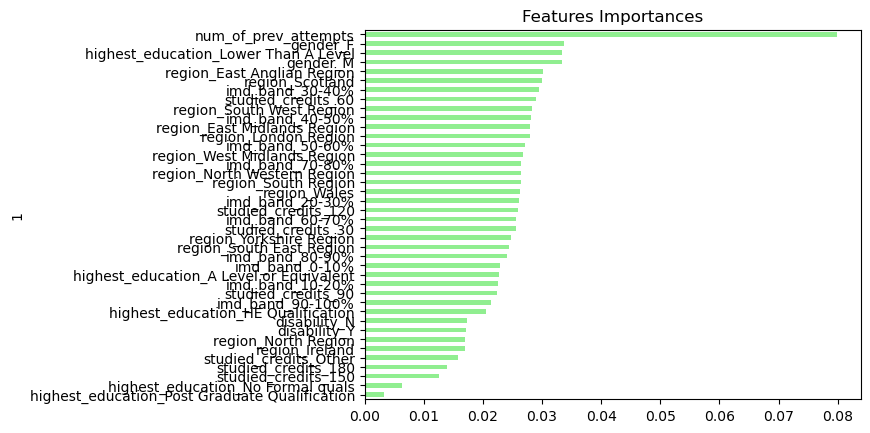

In [35]:
# Define features set
X = demo_df_n.copy()
X.drop("final_result", axis=1, inplace=True)

#Encode the categorical data 
X = pd.get_dummies(X)

 # Define target vector
y = demo_df_n["final_result"].ravel()

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

 # Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

neutral network

In [38]:
# Convert categorical data to numeric with `pd.get_dummies`
category_convert = pd.get_dummies(demo_df_n)

# Split our preprocessed data into our features and target arrays
y = category_convert["final_result"].values
X = category_convert.drop(["final_result"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


/var/folders/t4/k2tbzzpn1hsdycb190cq1m5w0000gn/T/ipykernel_39929/2866050442.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = category_convert.drop(["final_result"],1).values
/Users/patricbeaven/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 379 (1.48 KB)

 Trainable params: 379 (1.48 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.5578 - loss: 0.8176
Epoch 2/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.6003 - loss: 0.6631
Epoch 3/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.6051 - loss: 0.6599
Epoch 4/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.6064 - loss: 0.6583
Epoch 5/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.6175 - loss: 0.6541
Epoch 6/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.6129 - loss: 0.6540
Epoch 7/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.6131 - loss: 0.6564
Epoch 8/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.6156 - loss: 0.6542
Epoch 9/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.6162 - loss: 0.6527
Epoch 10/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.6213 - loss: 0.6517
Epoch 11/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.6224 - loss: 0.6511
Epoch 12/100
738/73

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

246/246 - 0s - 355us/step - accuracy: 0.5970 - loss: 0.6690
Loss: 0.6689900755882263, Accuracy: 0.5970016717910767
